# Face segmentation

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)
flags[40]




'COLOR_BGR2HLS'

In [4]:
def segmentation(image_s):
    image = cv2.cvtColor(image_s, cv2.COLOR_BGR2RGB)
    hsv_ = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_skin = (5, 50, 50)
    dark_skin =(12, 255, 255)
    mask = cv2.inRange(hsv_, light_skin, dark_skin)
    result = cv2.bitwise_and(image, image, mask=mask)
    #plt.imshow(result)
    #plt.show()
    detect(result, image_s)


In [46]:
def detect(image_s, image_o):
    gray = cv2.cvtColor(image_s, cv2.COLOR_BGR2GRAY)
    gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    blurred = cv2.blur(gradient, (9,9))

    #plt.imshow(blurred)
    (_, thresh) = cv2.threshold(blurred, 125, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    #plt.imshow(closed)

    closed = cv2.erode(closed, None, iterations = 4)
    #plt.imshow(closed)
    closed = cv2.dilate(closed, None, iterations = 4)

    (_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(image_o, [box], -1, (0, 255, 0), 10)
    c_ = sorted(cnts, key = cv2.contourArea, reverse = True)[1]
    rect_ = cv2.minAreaRect(c_)
    box_ = np.int0(cv2.boxPoints(rect_))
    cv2.drawContours(image_o, [box_], -1, (0, 255, 0), 10)
    image_new = cv2.cvtColor(image_o, cv2.COLOR_BGR2RGB)
    plt.imshow(image_new)

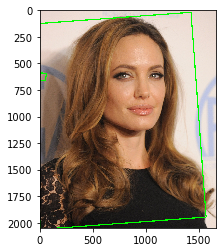

In [48]:
image1 = cv2.imread('1.jpg')
segmentation(image1)

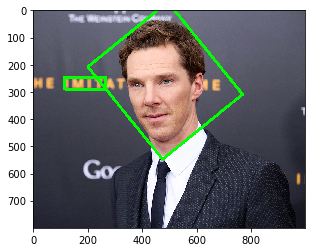

In [49]:
image2 = cv2.imread('2.jpg')
segmentation(image2)

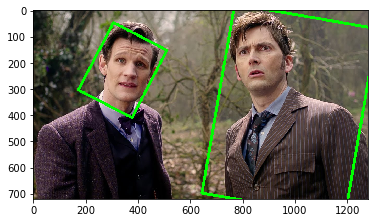

In [47]:
image3 = cv2.imread('3.jpg')
segmentation(image3)

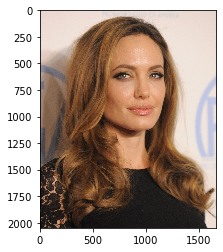

In [2]:
image1 = cv2.imread('1.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

# Implement

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

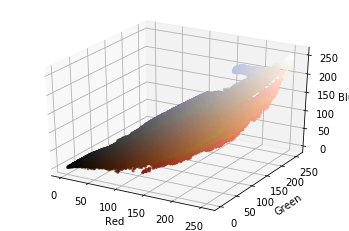

In [4]:
r, g, b = cv2.split(image1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image1.reshape((np.shape(image1)[0]*np.shape(image1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

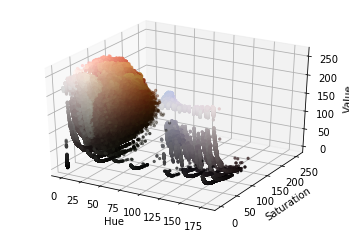

In [5]:
hsv_1 = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

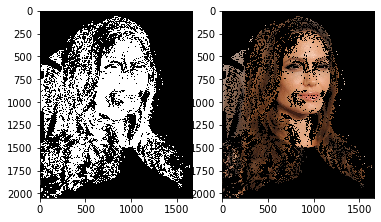

In [25]:
light_skin = (5, 50, 50)
dark_skin =(12, 255, 255)
mask = cv2.inRange(hsv_1, light_skin, dark_skin)
result = cv2.bitwise_and(image1, image1, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()